# ***PCA: otros ejemplos y algunas funciones útiles.***

## ***Universidad Central***





## ***Idea central:***

Se tiene un conjunto de $p$ features cuantitativas y se quieren construir un numero de features $r\leq p$ con independencia lineal u ortogonales, que contengan la mayor cantidad de variabilidad en el dataset.

## ***Términos clave para el análisis de componentes principales.***

- **Componente principal:** Una combinación lineal de las features originales.

- **Loading:** Los pesos que transforman las features originales en las componentes principales.

- **Gráfico de sedimentación:** Un plot de las varianzas de las componentes, que muestra la importancia relativa de las componentes, ya sea como varianza explicada o como proporción de la varianza explicada.

## ***Protocolo de módulos PCA.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
##
from sklearn.decomposition import PCA            ## Principal component analysis.
from sklearn.preprocessing import StandardScaler ## Escalar datos.
##
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

## ***Construcción de algunas funciones auxiliares***

En los siguientes bloques de código se muestran algunas funciones que pueden de ser de ayuda para el ánalisis de PCA en `Python`.

Todas fueron construidas por el autor de este cuaderno, con apoyo del material de la página oficial de [`plotly,`](https://plotly.com/python/pca-visualization/) tenga la libertad de entenderla, mejorarla y por supuesto compartir dicha mejoras.

### **[Biplot](https://wiki.q-researchsoftware.com/wiki/Principal_Components_Analysis_Biplot)**

La siguiente función generá un biplot donde se muestran los espacios de individuos y las variables en un solo plot.

In [2]:
def biplot(pca=None, dataframe=None, comp1=1, comp2=2,):
  """
    Esta función construye el biplot del correspodiente pca.
    Input:  pca: Objeto pca que se desea plotear.
            dataframe: pandas-DataFrame con el que se realizó el pca.
            comp1 = Componente en el eje x.
            comp2 = Compomente en el eje y
    Output: Biplot.
  """
  ## Trabajo con pca y dataframe.
  comp_1, comp_2 = str(comp1), str(comp2) ## Strings de las compomentes a plotear.
  vectores = pca.components_[[comp1-1,comp2-1]].T * np.sqrt(pca.explained_variance_[[comp1-1,comp2-1]])
  scaler, length = StandardScaler(), len(pca.explained_variance_)
  scaler.fit(dataframe)
  X_scaled = scaler.transform(dataframe)
  if dataframe.index.name == None:        ## En caso que el DataFrame no tenga nombre para el índice.
    dataframe.index.name = "Indice"
  pca_trans = pd.DataFrame(pca.transform(X_scaled), index = dataframe.index, 
                           columns = ["PC" + str(comp) for comp in range(1, length+1)])
  text_list = [pca_trans.index.name + ": {}".format(pca_trans.index[i]) for i in range(0,len(dataframe))]

  features = dataframe.columns
  ##
  fig = go.Figure()
  fig.add_trace(go.Scatter(x = pca_trans["PC"+ comp_1], y = pca_trans["PC"+comp_2], mode='markers',
                           hovertemplate ='<b>%{text}</b>' +'<br><br><b>PCX</b>: %{x:.2f}<br>'+
                           '<b>PCY</b>: %{y:.2f}<br>', name = "", text = text_list,))
  ## construcción del biplot.  
  for count, feature in enumerate(features):
    fig.add_annotation(x = vectores[count,0], y = vectores[count,1], ax = 0, ay = 0,
                       xref='x', yref='y',  axref='x',  ayref='y',  text='',showarrow=True, 
                       arrowhead=3, arrowsize=1, arrowwidth=1, arrowcolor='black')
    ##
    fig.add_annotation(x = vectores[count, 0], y = vectores[count, 1],ax = 0, ay = 0, xanchor = "center", 
                       text = feature, showarrow = True, arrowhead = 3, arrowcolor='rgb(255,51,0)',
                       font = dict(family = "Courier New, monospace", size = 10, color = "black"), 
                       yanchor = "bottom",)
  ## Personalización plot
  percent_var = pca.explained_variance_ratio_*100
  fig.update_layout(title = "Biplot.")
  fig.update_xaxes(range = [min(pca_trans["PC"+comp_1] - 0.2), max(pca_trans["PC"+comp_1]) + 0.2], 
                   title_text = "Dim "+ comp_1 + " ({:.2f}%)".format(percent_var[comp1-1]))  
  fig.update_yaxes(range = [min(pca_trans["PC"+comp_2] - 0.2), max(pca_trans["PC"+comp_2]) + 0.2],
                   title_text = "Dim "+ comp_2+ " ({:.2f}%)".format(percent_var[comp2-1]))
  fig.show()

Esta función genera solo el primer plano factorial donde se aprecia la influencia de la features en dicho plano

In [3]:
def biplot1(pca=None, dataframe=None):
  """
    Esta función construye el biplot del correspodiente pca.
    Input:  pca: Objeto que pca que se desea plotear.
            dataframe: pandas-DataFrame con el que se realizo el pca.
    Output: None.
  """
  fig = go.Figure()
  ## Circulo unitario.
  fig.add_shape(type="circle", x0=-1, y0=-1, x1=1, y1=1,line_color = "blue", line_width = 0.5,
                line_dash = "solid",)
  ## Trabajo con el pca.
  vectores = pca.components_.T * np.sqrt(pca.explained_variance_)
  features = dataframe.columns
  ## construcción del plot.  
  for count, features in enumerate(features):
    fig.add_annotation(x = vectores[count,0], y = vectores[count,1], ax = 0, ay = 0,
                       xref='x', yref='y',  axref='x',  ayref='y',  text='',showarrow=True, 
                       arrowhead=3, arrowsize=1, arrowwidth=1, arrowcolor='black')
    ##
    fig.add_annotation(x = vectores[count, 0], y = vectores[count, 1],ax=0, ay=0,xanchor="center", 
                       text = features, showarrow = True, arrowhead = 3, arrowcolor='rgb(255,51,0)',
                       font=dict(family="Courier New, monospace",size=10,color="black"), 
                       yanchor="bottom",)
  ## Personalización plot
  percent_var = pca.explained_variance_ratio_*100
  fig.update_layout(width=500, height=500, title = "Primer plano factorial.")
  fig.update_xaxes(range = [-1, 1], title_text = "Dim 1" + " ({:.2f}%)".format(percent_var[0]))  
  fig.update_yaxes(range = [-1, 1], title_text = "Dim 2" + " ({:.2f}%)".format(percent_var[1]))
  fig.show()

`view_index` permite seleccionar algunos registros del dataframe en pro de un mejor entendimiento de los plots anteriores.

In [4]:
def view_index(df,indexs):
  """
    Esta función muestra la información del dataframe df proporcionando una lista de indexs.    
    Input: df: pandas-DataFrame 
           indexs: Lista con el índice o índices a seleccionar del DataFrame.
    Output: pandas-DataFrame con la información del índice o índices.
  """
  if len(indexs) == 1:
    return df.loc[indexs[0]].to_frame().T
  else:
    return pd.concat([df.loc[index,] for index in indexs], axis =1).T

`sedimentacion` genera el gráfico de sediemntación para buscar un posible método para la selección de variables.

In [5]:
def sedimentacion(pca):
  """ Esta función genera un plot de sediemntación del objeto pca en el argumento
      Input: Objeto pca (from sklearn PCA)
      Ouput: None
  """
  expl_var = pca.explained_variance_ratio_
  str_componen = ["CP{}".format(i+1)  for i in range(0,len(expl_var))]
  df = pd.DataFrame({"componente": str_componen,
                     "% varianza": expl_var*100,
                     "% acumulada": np.cumsum(expl_var*100)})
  fig = px.bar(df, x = "componente",y = "% varianza",
               hover_data={"componente":False,
                           "% acumulada":True,
                           "% varianza":":.2f",
                           "% acumulada":":.2f"},
               hover_name = "componente",
               title = "Gráfico de sedimentación"
               )
  fig.show()

`plot_loadings_heatmap()` genera un barplot de las cargas en cada una de las componentes principales.

In [6]:
def plot_loadings_heatmap(pca, df_pca, n_compo = 2):
  """
      Esta función genera un heatmap de los loadings de las componentes pricipales que se tienen
      en el objeto pca que se recibe.
      Input:  pca: Objeto PCA (sklearn)
              df_pca: pandas DataFrame con quien se realizo el pca. O una lista de los nombres 
                      de igual cantidad que las compomentes principales del objeto pca ingresado.
              n_compo: Número de componentes principales, a las cuales se les desea ver sus loadings.
      Output: None
  """
  components = pca.components_[0:n_compo]
  yticks = [f"ACP{i}" for i in range(1,n_compo+1)]
  sns.heatmap(components, xticklabels = df_pca.columns, yticklabels = yticks, annot=True, cmap="PuBu")
  plt.title("Heatmap loadigns",fontsize = 10)
  plt.show()

`plot_loadings_bar()` genera un barplot de las cargas en cada una de las componentes principales.

## ***Ejemplo 1***

El dataset `birds.txt` contiene medidas corporales de aves, buscar realizar un análisis de la selección natural. 

Se tiene una información adicional sobre el índice de los registros, **de la ave 1 a la 21 sobrevivieron.**

In [7]:
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
df_name1 = "birds.txt"
df1 = pd.read_csv(url_base + df_name1, sep = " ", index_col = 0,)
df1.head()

,longitud_total,extension_alas,longitud_pico_y_cabeza,longitud_humero,longitud_quilla
pajaro,,,,,
1,156,245,31.6,18.5,20.5
2,154,240,30.4,17.9,19.6
3,153,240,31.0,18.4,20.6
4,153,236,30.9,17.7,20.2
5,155,243,31.5,18.6,20.3


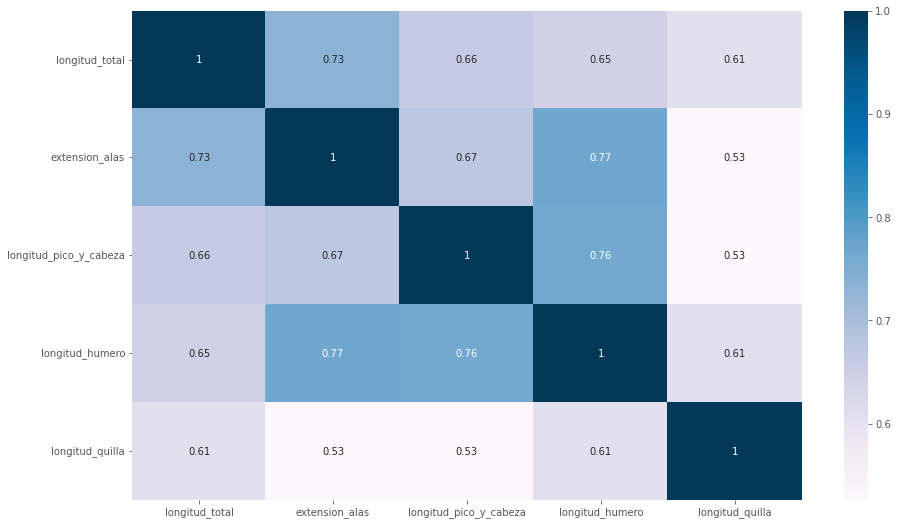

In [8]:
sns.heatmap(df1.corr(), annot = True, cmap = "PuBu")
plt.show()

Podemos observar una alta correlación lineal entre las variables, podemos pensar que un `PCA` podría estar bastaste bien en este caso.

In [9]:
## Rutina habitual de escalado.
scaler1 = StandardScaler()
scaler1.fit(df1)
X_scaled = scaler1.transform(df1)
pd.DataFrame(X_scaled, columns = df1.columns)

,longitud_total,extension_alas,longitud_pico_y_cabeza,longitud_humero,longitud_quilla
0,-0.547333,0.732373,0.179019,0.054812,-0.332785
1,-1.100309,-0.264468,-1.346531,-1.019498,-1.250023
2,-1.376796,-0.264468,-0.583756,-0.124240,-0.230870
3,-1.376796,-1.061941,-0.710885,-1.377602,-0.638531
4,-0.823821,0.333637,0.051889,0.233863,-0.536616
5,1.388081,1.131110,0.687535,0.950070,0.074877
6,-0.270845,-0.663205,-0.710885,-0.124240,-0.638531
7,-0.823821,-0.463836,1.704568,0.233863,0.380623
8,1.664569,1.330478,1.577439,1.129122,0.278707
9,0.005643,-0.663205,-0.583756,0.591967,1.195946


In [10]:
pca1 = PCA()
pca1.fit(X_scaled)

PCA()

In [11]:
## Plot de sediementación
sedimentacion(pca1)

Notemos la forma de codo que se presenta en la gráfica, dado que no hay un método puntual para la selección de las componentes principal, podemos optar por incluir cierta cantidad de varibilidad (un valor determinado) o determinar el número de componentes principales observando si hasta determinado punto la inclusión de una variable adicional tiene un peso significativo, recuerde que a más variables la interpretabilidad se vuelve bastante complicada.

Basados en lo anterior vamos a considerar vamos a conciderar **solo 2 componentes principales.**

In [12]:
## Comentario con software R.
print(pca1.explained_variance_)
print(pca1.explained_variance_ratio_)
print(np.cumsum(pca1.explained_variance_ratio_))

[3.69131123 0.54257708 0.39447506 0.30784813 0.16795517]
[0.72319567 0.10630082 0.07728491 0.0603131  0.0329055 ]
[0.72319567 0.82949648 0.90678139 0.9670945  1.        ]


In [13]:
components = 2
pca1 = PCA(n_components = components)
pca1.fit(X_scaled)

PCA(n_components=2)

In [14]:
expl = pca1.explained_variance_ratio_*100
print("""Con las {} primeras componentes principales, la cantidad de varianza explicada es: {:.2f}% 
      """.format(components,sum(expl[0:components])))

Con las 2 primeras componentes principales, la cantidad de varianza explicada es: 82.95% 
      


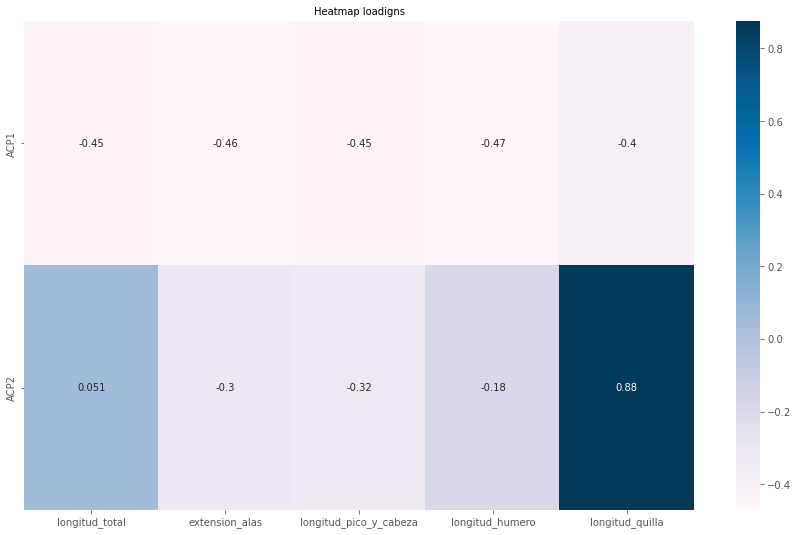

In [15]:
## Loadings.
plot_loadings_heatmap(pca1,df1)

Recuerde que los valores que se generan apartir de la primera componente principal es una combinación lineal de la forma:

<center>
$Y_1 = -0.45*longitudTotal -0.46*exetensionAlas-0.45*longitudPicoCebeza-0.47*longitudHumero-0.4*longitudQuilla$
</center>

Vemos que todos los coeficientes son negativos, y además, aproximadamente el $72.3\%$ de la variación está relacionada con las diferencias de tamaño, luego $Y_1$ es un indicador del ***tamaño de las aves***.

De manera completamente análoga, $Y_2$, reúne las variables que registran la ***forma de las aves***, pues se contrastan las features: extensión de las alas, longitud de pico y cabeza, extensión del húmero con longitud de la quilla. Mientras el primer grupo aumenta, la longitud de la quilla disminuye y viceversa.

La información transformada se encuentra es el siguiente código.

In [16]:
pca1_trans = pca1.transform(X_scaled)
pca1_trans =  pd.DataFrame(pca1_trans, index = df1.index, columns = ["PC1","PC2",])
pca1_trans.head()

,PC1,PC2
pajaro,,
1,-0.064955,-0.607064
2,2.202907,-0.446884
3,1.157437,0.019454
4,2.335015,0.173775
5,0.298100,-0.672101


In [17]:
print("Se ajustó un PCA a una data de tamaño:",df1.shape)
print("Se obtuvo un ajuste por PCA de tamaño:",pca1_trans.shape)

Se ajustó un PCA a una data de tamaño: (49, 5)
Se obtuvo un ajuste por PCA de tamaño: (49, 2)


In [18]:
biplot(pca1,df1)

Teniendo en cuenta lo comentado en el párrafo anterior, la ave número 31 (arriba en el centro) tiene el valor más alto respecto a la longitud de la quilla. Las aves 30, 25, 37 (a la derecha) tienen valores bajos (con respecto a la medía) en varias features (muchas ponderan en el primer componente principal). En constraste tenemos las aves 29, 40. La ave "propotípo" esta en el centro del plot (ave 41).

In [19]:
view_index(df1,[31,30,25,37,29,40])

,longitud_total,extension_alas,longitud_pico_y_cabeza,longitud_humero,longitud_quilla
31,162.0,239.0,30.3,18.0,23.1
30,153.0,231.0,30.1,17.3,19.8
25,152.0,232.0,30.3,17.2,19.8
37,152.0,230.0,30.4,17.3,18.6
29,165.0,245.0,33.1,19.8,22.7
40,163.0,249.0,33.4,19.5,22.8


In [20]:
df1.mean()

longitud_total            157.979592
extension_alas            241.326531
longitud_pico_y_cabeza     31.459184
longitud_humero            18.469388
longitud_quilla            20.826531
dtype: float64

El siguiente plot:

In [21]:
biplot1(pca1,df1)

se puede observar como el primer eje en el plano factorial está influenciado por la longitud del húmero y la longitud total, para el segundo eje factorial, longitud de la quilla y longitud del pico y cabeza.

In [22]:
## Selección natural.
temp = pca1_trans.copy()
temp["sobrevivio"] = ["vivo" if x<22 else "muerto" for x in df1.index.values]
fig = px.scatter(temp, x = "PC1", y = "PC2", color = "sobrevivio",)
fig.show()

In [23]:
def plot_loadings_bar(pca,df_pca, n_compo = 2, rotation=90):
  """
      Esta función genera un heatmap de los loadings de las componentes pricipales que se tienen
      en el objeto pca que se recibe.
      Input:  pca: Objeto PCA (sklearn)
              df_pca: pandas DataFrame con quien se realizo el pca. O una lista de los nombres 
                      de igual cantidad que las compomentes principales del objeto pca ingresado.
              n_compo: Número de componentes principales, a las cuales se les desea ver sus loadings.
              rotation: Grado de rotación de los xticks.
      Output: None
  """
  componets, n = pca.components_[0:n_compo], len(pca.components_[0:n_compo])
  loadings = pd.DataFrame(componets, columns = df_pca.columns)  
  loadings.index = [f"CP{i+1}" for i in range(0,n)]
  loadings, max_eje_y = loadings.T, np.max(loadings.abs().max())
  ######
  if n_compo == 2:
    fig, axes = plt.subplots(int(n/2),2,sharey = True)
    for i in range(0,n_compo):
        temp = loadings["CP{}".format(i+1)].to_frame()
        temp["color"] = [0 if x<0 else 1 for x in temp["CP{}".format(i+1)]]
        g = sns.barplot(temp.index, y = temp["CP{}".format(i+1)], ax = axes[i],hue = temp["color"],)
        g.axhline(color='#888888')
        g.legend_.remove()
        g.tick_params(labelrotation=rotation)
        plt.ylim(-1.01*max_eje_y,1.01*max_eje_y)
  #####
  elif n%2==0:
    fig, axes = plt.subplots(int(n/2),2,sharey = True)
    for i in range(0,n_compo):
        a, b = i//2, i%2
        temp = loadings["CP{}".format(i+1)].to_frame()
        temp["color"] = [0 if x<0 else 1 for x in temp["CP{}".format(i+1)]]
        g = sns.barplot(temp.index, y = temp["CP{}".format(i+1)], ax = axes[a,b],hue = temp["color"],)
        g.axhline(color='#888888')
        g.legend_.remove()
        plt.ylim(-1.01*max_eje_y,1.01*max_eje_y)
        g.tick_params(labelrotation=rotation)
  #####
  else:
    fig, axes = plt.subplots(int(n/2)+1,2,sharey = True)
    for i in range(0,n_compo):
        a, b = i//2, i%2
        temp = loadings["CP{}".format(i+1)].to_frame()
        temp["color"] = [0 if x<0 else 1 for x in temp["CP{}".format(i+1)]]
        g = sns.barplot(temp.index, y = temp["CP{}".format(i+1)], ax = axes[a,b],hue = temp["color"],)
        g.axhline(color='#888888')
        g.legend_.remove()
        plt.ylim(-1.01*max_eje_y,1.01*max_eje_y)
        g.tick_params(labelrotation=rotation)
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
  fig.suptitle("Loadings para las primeras {} componentes principales.".format(n_compo), y = 1.1,
               fontsize = 16)

## ***Retomando un ejemplo anterior.***

Consideremos el dataset `Global_Carbon_Budget_2018.csv`.

In [24]:
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
df_name = "Global_Carbon_Budget_2018.csv"
df = pd.read_csv(url_base + df_name, sep=";", decimal=",", index_col = "Year")
###
df.head()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1750,NaN,NaN,-0.08,NaN,0.09,NaN
1751,0.0,NaN,-0.07,NaN,-0.53,NaN
1752,0.0,NaN,-0.07,NaN,-0.27,NaN
1753,0.0,NaN,-0.07,NaN,-0.17,NaN
1754,0.0,NaN,-0.06,NaN,-0.33,NaN


<center>

|feature|Traducción|
|:---|---:|
|fossil fuel and industry|Combustible fósil e industría|
|land-use change emissions|emisiones de cambio de uso de la tierra|
|atmospheric growth|crecimiento atmosférico|
|ocean sink|sumidero del oceano|
|land sink|sumidero de tierra|
|budget imbalance|desequilibrio presupuestario|

</center>


In [25]:
## Rutina escalamiento.
df_pca = df.drop(columns=["budget imbalance"])
df_pca = df_pca.dropna()            
scaler = StandardScaler()           
scaler.fit(df_pca)                  
X_scaled = scaler.transform(df_pca)

In [26]:
pd.DataFrame(X_scaled, index = df_pca.index, columns = df_pca.columns).corr()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink
fossil fuel and industry,1.000000,0.404771,0.969705,0.988774,0.727075
land-use change emissions,0.404771,1.000000,0.293668,0.426617,0.295279
atmospheric growth,0.969705,0.293668,1.000000,0.966279,0.711759
ocean sink,0.988774,0.426617,0.966279,1.000000,0.726006
land sink,0.727075,0.295279,0.711759,0.726006,1.000000


In [27]:
## Rutina PCA
pca = PCA()
pca.fit(X_scaled)                   
pca_array = pca.transform(X_scaled)

In [28]:
## Plot de sedimentación
sedimentacion(pca)

In [29]:
name_columns = [f"PC{i+1}" for i in range(0,pca_array.shape[1])]
pca_trans =  pd.DataFrame(pca_array, index = df_pca.index, columns = name_columns)
pca_trans.head()

,PC1,PC2,PC3,PC4,PC5
Year,,,,,
1850,-2.095784,-1.196339,0.250146,0.083911,0.128713
1851,-2.381818,-1.092507,-0.303762,0.142315,0.118502
1852,-2.263906,-1.095204,-0.005834,0.179125,0.122529
1853,-2.378335,-1.053040,-0.175729,0.224897,0.123368
1854,-2.352181,-1.059783,-0.066733,0.261231,0.126965


In [30]:
pca.components_

array([[ 0.50625924,  0.25177241,  0.49391515,  0.50715776,  0.42326242],
       [-0.08557012,  0.95984491, -0.2149806 , -0.0587595 , -0.14733009],
       [-0.24669646,  0.03728889, -0.28105587, -0.24452182,  0.89384958],
       [ 0.41578379, -0.11667435, -0.79418177,  0.42733142, -0.01319523],
       [ 0.70897393,  0.01746506, -0.01068107, -0.70493636, -0.0012577 ]])

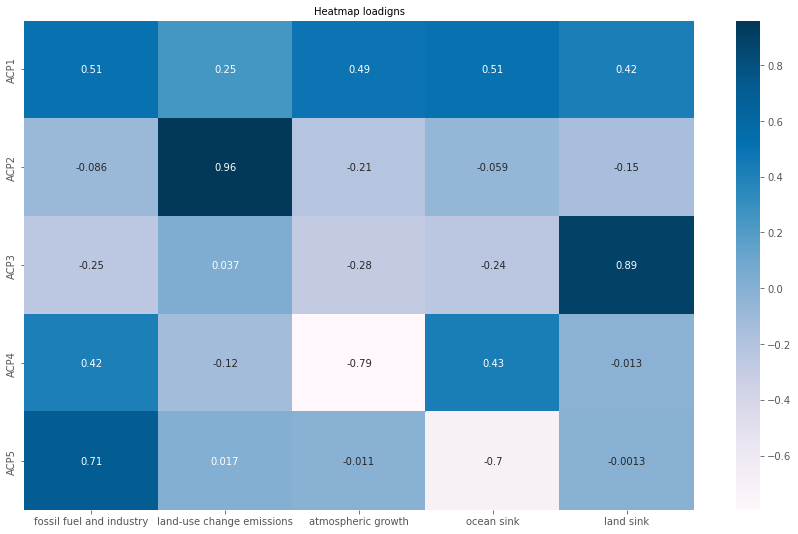

In [31]:
## Plot loadings.
plot_loadings_heatmap(pca,df_pca,n_compo=5)

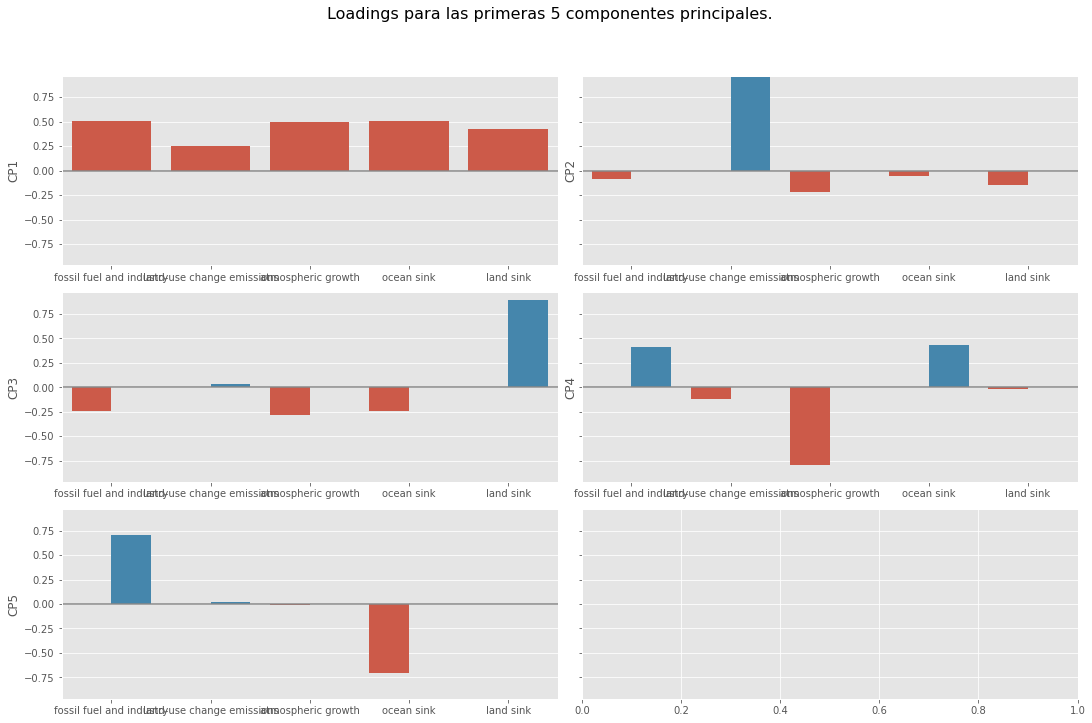

In [32]:
plot_loadings_bar(pca,df_pca,n_compo = 5, rotation = 0)

In [33]:
df_pca.mean()

fossil fuel and industry     1.999677
land-use change emissions    1.182645
atmospheric growth           1.204452
ocean sink                   0.834645
land sink                    1.008129
dtype: float64

In [34]:
biplot(pca,df_pca)

In [35]:
view_index(df_pca,[1867,1958,1997,1999])

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink
1867,0.13,0.67,0.39,0.25,0.55
1958,2.33,1.79,1.02,0.81,-0.06
1997,6.53,1.78,3.39,2.14,2.98
1999,6.53,1.20,3.43,2.28,3.70


In [36]:
biplot1(pca,df_pca)

## ***Ejemplo 2.***

Vamos a considerar el dataframe `Delitos_Colombia.csv` que contiene el número de delitos por departamento, en distintas categorías. Toda la información es numérica.

In [37]:
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
df_name2 = "Delitos_Colombia.csv"
df2 = pd.read_csv(url_base + df_name2, sep=";", decimal=",", index_col=0)
df2.head()

,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion
Departamento,,,,,,
Antioquia,2163,375,5079,11897,8205,6690977
Atlantico,1042,85,1928,59,3659,2546138
Bogota_D.C.,4211,1463,725,2725,19811,8181047
Bolivar,944,28,922,3812,2085,2171558
Boyaca,517,95,1167,4084,2707,1281979


In [38]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Delitos_Sexuales,33.0,6.484545e+02,8.246769e+02,0.0,204.0,420.0,616.0,4211.0
Homicidios,33.0,1.161818e+02,2.596099e+02,0.0,17.0,58.0,81.0,1463.0
Transito,33.0,1.173667e+03,1.371468e+03,0.0,143.0,861.0,1248.0,5599.0
Asalto,33.0,2.816121e+03,3.001322e+03,1.0,654.0,2243.0,3766.0,11897.0
Intrafamiliar,33.0,2.059242e+03,3.590915e+03,2.0,411.0,1083.0,2142.0,19811.0
Poblacion,33.0,1.510143e+06,1.827319e+06,43446.0,375258.0,1040193.0,1788648.0,8181047.0


In [39]:
# Seleccionamos las cuantitativas (ACP solo trabaja con cuantitativas). Cuando sea el caso seleccionamos 
# así: -----> cuanti = df2.select_dtypes(np.number)

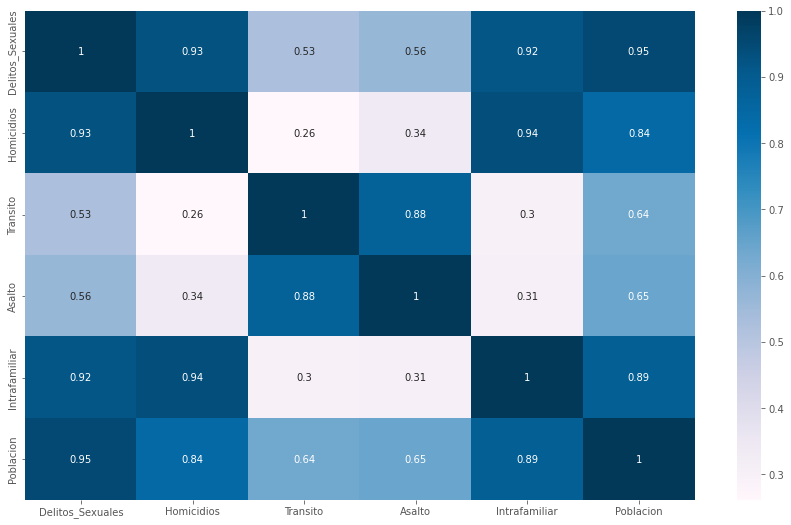

In [40]:
sns.heatmap(df2.corr(), annot = True, cmap = "PuBu")
plt.show()

Notemos que las diferencias en las desviaciones en las distintas features es bastante alta, debemos por tanto realizar unas "mejoras" en nuestro dataset.

1. Para realizar un mejor análisis vamos considerar la siguiente tasa (para todas las variables):

$$Tasa Delitos Sexuales=100.000\times \frac{Delitos Sexuales}{Poblacion}$$

la cual representa la incidencia por cada $100.000$ habitantes.

In [41]:
df2_pca = df2.copy()
df2_pca["DSex_p"] = 100000*df2_pca["Delitos_Sexuales"]/df2_pca["Poblacion"]
df2_pca["DHom_p"] = 100000*df2_pca["Homicidios"]/df2_pca["Poblacion"]
df2_pca["DIntra_p"] = 100000*df2_pca["Intrafamiliar"]/df2_pca["Poblacion"]
df2_pca["DTransi_p"] = 100000*df2_pca["Transito"]/df2_pca["Poblacion"]
df2_pca["DAsal_p"] = 100000*df2_pca["Asalto"]/df2_pca["Poblacion"]
df2_pca = df2_pca[["DSex_p", "DHom_p", "DIntra_p", "DTransi_p", "DAsal_p"]]
df2_pca

,DSex_p,DHom_p,DIntra_p,DTransi_p,DAsal_p
Departamento,,,,,
Antioquia,32.327118,5.604563,122.627831,75.908197,177.806619
Atlantico,40.924726,3.338389,143.707843,75.722526,2.317235
Bogota_D.C.,51.472629,17.882797,242.157269,8.861946,33.308695
Bolivar,43.471093,1.289397,96.014014,42.457996,175.542168
Boyaca,40.328274,7.410418,211.157905,91.031132,318.569961
Caldas,44.573234,6.540091,98.101361,125.569743,225.683439
Caqueta,44.532928,3.627116,90.476402,24.382282,131.785226
Cauca,29.657980,4.378083,104.156001,60.798859,167.920658
Cesar,52.644568,4.128986,131.564501,79.013773,258.718494


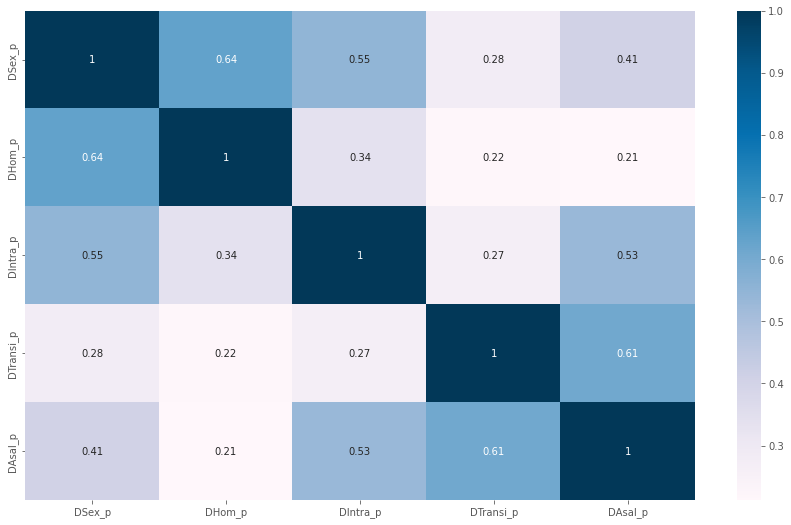

In [42]:
sns.heatmap(df2_pca.corr(), annot = True, cmap = "PuBu")
plt.show()

2. Vamos  escalar la información para buscar mitigar la variables que tienen altas varianzas, ya que estas se llevarian el mayor de la variabilidad total. Deseamos que su variabilidad sea mitigada.

In [43]:
scaler2 = StandardScaler()            # Cargando el escalador estandar
scaler2.fit(df2_pca)                  # Calcula las medias y las desviaciones
X_scaled = scaler2.transform(df2_pca) # Estandariza la data.
pd.DataFrame(X_scaled, index = df2_pca.index, columns = df2_pca.columns)

,DSex_p,DHom_p,DIntra_p,DTransi_p,DAsal_p
Departamento,,,,,
Antioquia,-0.663883,-0.196509,-0.199243,-0.104096,-0.361624
Atlantico,-0.239343,-0.508407,0.046727,-0.107368,-1.747823
Bogota_D.C.,0.281500,1.493371,1.195478,-1.285749,-1.503020
Bolivar,-0.113606,-0.790414,-0.509785,-0.693637,-0.379511
Boyaca,-0.268795,0.052035,0.833764,0.162437,0.750273
Caldas,-0.059184,-0.067750,-0.485429,0.771161,0.016557
Caqueta,-0.061174,-0.468669,-0.574400,-1.012212,-0.725149
Cauca,-0.795682,-0.365312,-0.414780,-0.370390,-0.439714
Cesar,0.339369,-0.399596,-0.094966,-0.049362,0.277503


In [44]:
## Realizamos la rutina habitual.
pca2 = PCA(n_components = 0.85) 
pca2.fit(X_scaled)
n_comp, var_exp = len(pca2.explained_variance_ratio_), sum(pca2.explained_variance_ratio_)
print("Con {} componentes se explica el {:.2f}% de la variabilidad".format(n_comp,var_exp*100))

Con 3 componentes se explica el 87.92% de la variabilidad


In [45]:
## Plot de sedimentación
sedimentacion(pca2)

In [46]:
pca2_trans = pca2.transform(X_scaled)
pca2_trans =  pd.DataFrame(pca2_trans, index = df2.index, columns = ["PC1","PC2","PC3"])
pca2_trans.head()

,PC1,PC2,PC3
Departamento,,,
Antioquia,0.712187,-0.151438,0.039164
Atlantico,1.168391,0.511234,-0.088261
Bogota_D.C.,-0.086747,2.423493,-0.615291
Bolivar,1.062042,0.059052,-0.315585
Boyaca,-0.694155,-0.482570,-0.583906


In [47]:
print("Se ajustó un PCA a una data de tamaño:",df2_pca.shape)
print("Se obtuvo un ajuste por PCA de tamaño:",pca2_trans.shape)
expl = pca2.explained_variance_ratio_
print("Cantidad de varianza explicada: {:.2f}%".format(sum(expl[0:3])*100))

Se ajustó un PCA a una data de tamaño: (33, 5)
Se obtuvo un ajuste por PCA de tamaño: (33, 3)
Cantidad de varianza explicada: 87.92%


In [48]:
## La correlación lineal debe ser 0.
pca2_trans.corr()

,PC1,PC2,PC3
PC1,1.000000e+00,7.966107e-18,-4.284468e-17
PC2,7.966107e-18,1.000000e+00,1.333210e-15
PC3,-4.284468e-17,1.333210e-15,1.000000e+00


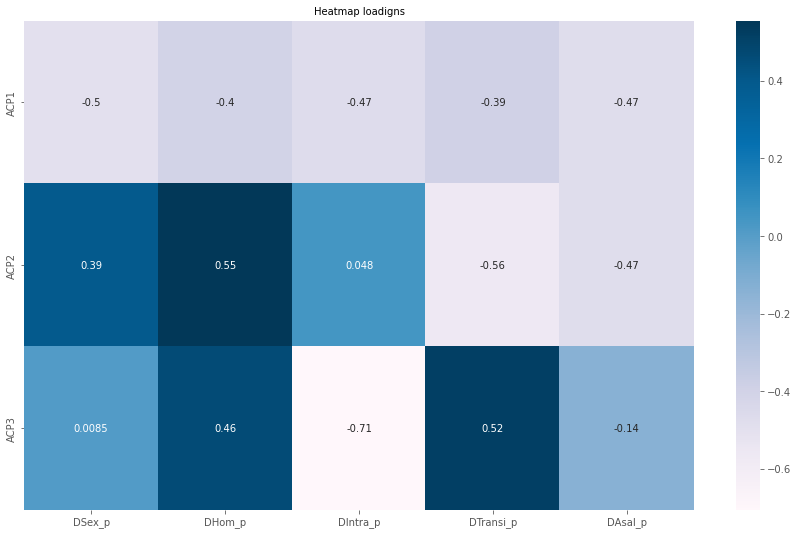

In [49]:
## Plot loadings
plot_loadings_heatmap(pca2,df2_pca,n_compo=3)

In [50]:
view_index(df2_pca,["Guainia","Arauca"])

,DSex_p,DHom_p,DIntra_p,DTransi_p,DAsal_p
Guainia,85.163191,39.129034,135.800764,64.447820,202.550292
Arauca,82.745985,15.884274,316.577271,79.421369,291.827356


In [51]:
df2_pca.mean()

DSex_p        45.771800
DHom_p         7.032346
DIntra_p     139.703236
DTransi_p     81.814546
DAsal_p      223.587321
dtype: float64

In [52]:
fig = px.scatter(pca2_trans, x = "PC1", y = "PC2",text = pca2_trans.index, hover_name = pca2_trans.index, 
                 title = "Interpretación",)
fig.show()

1. Notemos que los valores de **Vaupes** están muy por debajo de la media. Dado que los loading en la primera componente principal tiene sus pesos más altos en las features `DIntra_p` y `DAsal_p` se espera que el valor al ser transformado por la primera componente sea grande y negativo.

2. Para el caso de **San Andrés** sus valores en los loading más altos de la primera componente principal están muy encima de la media, en ese caso se espera que el valor transformado por la primera componente principal sea alto y positivo.

3. Para el caso de **Santander** sus valores están muy por debajo de la media en la feature `DIntra_p`, pensando en el segundo componente principal, y a su vez en los loadings se espera que su valor al ser transformado sea grande y negativo.

4. En contraste con lo anterior, **Arauca** que tiene un valor mucho más grande que la media, en la variable `DIntra_p` se espera que al ser transformado tenga un valor alto y positivo en la componente pricipal 2.

In [53]:
biplot(pca2,df2_pca,1,2)

In [54]:
biplot(pca2,df2_pca,1,3)

In [55]:
biplot(pca2,df2_pca,2,3)

## ***Ejemplo 3.***

El siguiente dataframe contiene los cambios de indices bursatiles para las 517 empresas más importantes de los EEUU. Este dataframe es muy usado en series de tiempo pues muestra el comportamiento de las empresas a través de la historia.

In [56]:
df_path3 = "sp500_data.csv.gz"
sp500_px = pd.read_csv(url_base+df_path3, compression='gzip', index_col = 0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


Para muestro análisis vamos a considerar las siguientes empresas:
<br></br>
<center>

|Eitiqueta|Nombre|Sector|
|:---:|:---:|:---:|
|AAPL|Apple Inc.|Information Technology|
|MSFT|Microsoft Corp|Information Technology|
|CSCO|Cisco Systems|Information Technology|
|INTC|Intel Corp|	Information Technology|
|CVX|Chevron Corp.|	Energy|
|XOM|	Exxon Mobil Corp|	Energy|
|SLB|	Schlumberger Ltd|	Energy|
|COP|	ConocoPhillips|	Energy|
|JPM|	JPMorgan Chase & Co|Financials|
|WFC|	Wells Fargo|	Financials|
|USB|	U.S. Bancorp|	Financials|
|AXP|	American Express Co|Financials|
|WMT|	Wal-Mart Stores|	Consumer Staples|
|TGT|	Target Corp.|	Consumer Discretionary|
|HD|	Home Depot|	Consumer Discretionary|
|COST|Costco Wholesale Corp.|	Consumer Staples|

 </center> 




Además de considerar los datos desde el 01 de enero de 2011 y hasta el final de los registros, en este caso 01 de julio del año 2015.

In [57]:
col_sel = sorted(["AAPL", "MSFT", "CSCO", "INTC", "CVX", "XOM", "SLB", "COP", "JPM", "WFC", 
                  "USB", "AXP", "WMT", "TGT", "HD", "COST"])
df_pca3 = sp500_px.loc[sp500_px.index >= "2011-01-01", col_sel]
df_pca3.head()

,AAPL,AXP,COP,COST,CSCO,CVX,HD,INTC,JPM,MSFT,SLB,TGT,USB,WFC,WMT,XOM
2011-01-03,0.527368,0.093870,-0.336272,-0.240605,0.035704,0.240681,0.099184,-0.137211,0.512093,-0.061805,-0.325923,0.455646,-0.234866,0.250042,0.294839,0.736805
2011-01-04,-0.154321,-0.431788,-0.463161,-0.171859,0.008926,-0.584516,-0.541005,0.025726,0.335894,0.132440,-2.030049,-0.580720,-0.153566,0.000000,0.142951,0.168668
2011-01-05,0.597152,0.895406,-0.057104,-0.859307,0.169599,0.446985,-0.054099,-0.214392,0.689468,0.088294,1.536499,-0.482448,0.198732,0.857284,-0.303772,0.026631
2011-01-06,-0.132850,-0.612646,-0.463161,0.249200,0.035706,-0.919751,-0.189354,0.085757,0.070713,0.688689,-1.927614,-0.786210,-0.532962,0.000000,-0.312709,0.248558
2011-01-07,0.285820,-0.537242,-0.006350,-0.257788,0.098187,0.180511,-0.036064,-0.042878,-0.795539,-0.035317,0.931215,-0.089345,-0.171633,-0.651894,0.169758,0.337329


Realizamos la rutina habitual.

In [58]:
scaler3 = StandardScaler()
scaler3.fit(df_pca3)
X_scaled3 = scaler3.transform(df_pca3)
pd.DataFrame(X_scaled3, index = df_pca3.index, columns = df_pca3.columns)

,AAPL,AXP,COP,COST,CSCO,CVX,HD,INTC,JPM,MSFT,SLB,TGT,USB,WFC,WMT,XOM
2011-01-03,0.561707,0.110812,-0.509688,-0.299786,0.117204,0.252913,0.094034,-0.555764,0.920070,-0.213019,-0.267647,0.794378,-0.764788,0.630204,0.509947,0.985516
2011-01-04,-0.107735,-0.651798,-0.710903,-0.220968,-0.008461,-0.599033,-0.824095,0.021865,0.596087,0.317332,-1.805599,-1.045530,-0.513618,-0.026284,0.212894,0.193236
2011-01-05,0.630238,1.273658,-0.066998,-1.009130,0.745557,0.465905,-0.125796,-0.829379,1.246217,0.196799,1.413166,-0.871062,0.574786,2.224522,-0.660779,-0.004839
2011-01-06,-0.086650,-0.914182,-0.710904,0.261778,0.117213,-0.945136,-0.319773,0.234680,0.108487,1.836075,-1.713152,-1.410346,-1.685740,-0.026284,-0.678256,0.304644
2011-01-07,0.324498,-0.804788,0.013486,-0.319486,0.410429,0.190793,-0.099932,-0.221342,-1.484324,-0.140698,0.866905,-0.173168,-0.569436,-1.737836,0.265322,0.428437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-1.291754,-1.629728,-1.482904,-1.170435,-0.795464,-1.141553,-1.482363,-0.175690,-1.245487,-1.081788,-0.596224,0.127481,-0.776401,-1.549084,-1.220558,-1.324935
2015-06-26,-0.859656,-0.444529,0.071124,0.113645,-1.028313,0.376100,-0.292015,-1.806437,-0.003276,-1.109110,0.279190,-0.742435,-0.100977,0.236264,0.246246,-0.000142
2015-06-29,-0.869479,-2.077787,-0.626603,-1.537309,-2.145990,-0.831825,-1.511042,-1.168325,-0.898404,-1.873597,0.080650,-2.482293,-1.583905,-1.969155,-0.809870,-0.362721
2015-06-30,-0.093671,-0.678215,-0.166733,-1.537325,-1.773440,-1.007334,-0.076901,-0.813805,-0.259013,-1.573247,-0.144973,-1.825412,-1.398532,-0.813934,-1.787726,-0.795020


In [59]:
## Realizamos la rutina habitual.
pca3 = PCA() 
pca3.fit(X_scaled3)

PCA()

In [60]:
## Plot de sedimentación.
sedimentacion(pca3)

Como se ve en el plot anterior, la varianza del primer componente principal es bastante grande (como
suele ser el caso), pero los otros componentes principales también son significativos.

¿Cuántas compomentes principales de deben seleccionar?

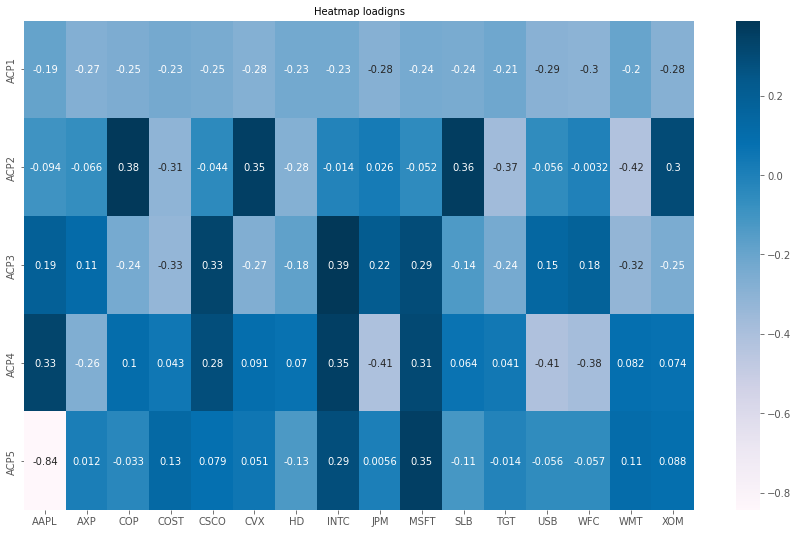

In [61]:
## Plot loadings
plot_loadings_heatmap(pca3,df_pca3,n_compo=5)

En el heatmap anterior se muestran las cargas para las primeras 5 compomentes principales del objeto `pca3`. 

- Los loadings del primer componente principal tienen el mismo signo, esto sucede típicamente cuando las features comparten un factor común (aquí, la tendencia general del mercado de valores). 

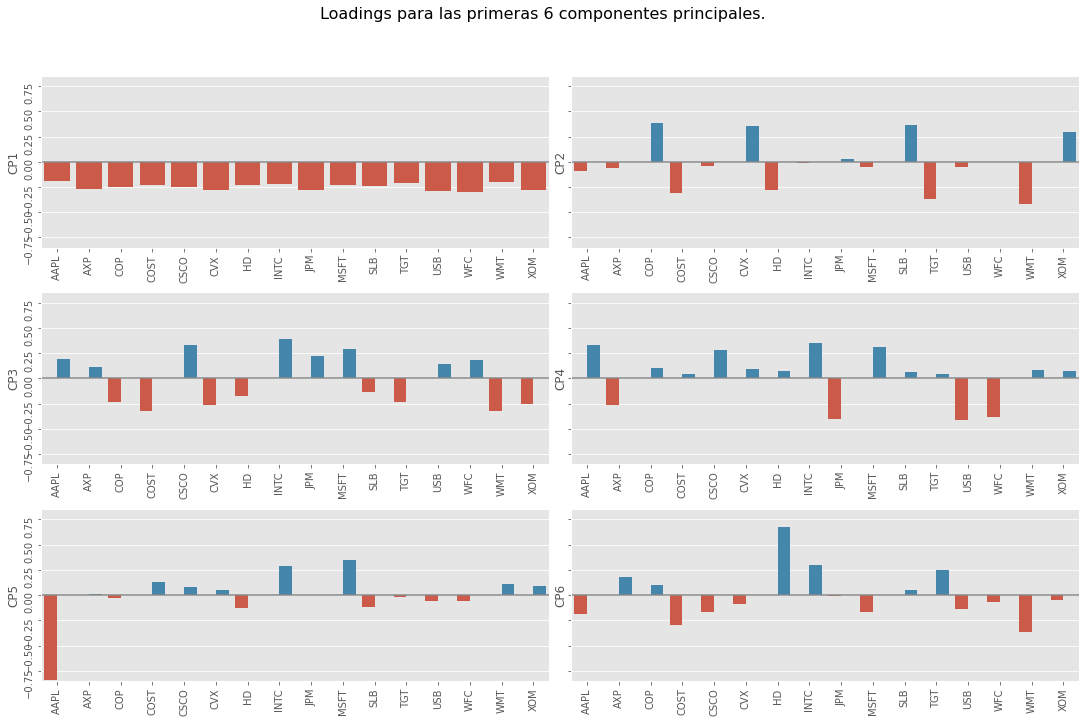

In [62]:
plot_loadings_bar(pca3,df_pca3, n_compo = 6)

* Al parecer el segundo componente captura los cambios de precio en aquellas acciones del sector de energía en comparación con las acciones del sector consumo.

* El tercer componente contrasta acciones de empresas tecnológicas y el sector energía.


* El cuarto componente contrasta los movimientos de las acciones financieras con las de la tecnología. 


* El quinto componente es principalmente un contraste en los movimientos de Apple y INTC y MSFT. 


In [63]:
biplot(pca3,df_pca3,1,5,)

In [64]:
biplot1(pca3,df_pca3)

## ***Ejercicio ***

Realizar un PCA con la base de emisiones y teniendo como individuo el año. Realice toda la rutina presentada en clase, busque generar sus propios análisis haciendo uso de las nuevas herramientas presentados en este cuaderno.

# ***Conclusiones.***

1. PCA es una técnica lineal que busca reducir la dimensionalidad del dataset buscando optimizar la perdida de información presente en la variabilidad.

2. Una desventaja de PCA es que los dos ejes del primer plano factorial a menudo no son muy fáciles de interpretar. Esto debido a que las componentes principales corresponden a direcciones en los datos originales, dado que son combinaciones de las features originales. 

3. Existen técnicas más modernas para realizar la reducción de dimensionalidad en el dataset, algunas las desarrollaremos más adelante en el curso.

## ***Tarea 1***

Realizar un análisis de compomentes principales de la tabla de los resultados de las pruebas [ICFES 2019-2](https://www.datos.gov.co/Educaci-n/PUNTAJE-ICFES-POR-DEPARTAMENTOS/x9vi-iv8c).